# Installing required libraries

**Keras** is a neural network library while **TensorFlow** is the open-source library for a number of various tasks in machine learning. Keras is a high-level interface and uses Theano or Tensorflow for its backend. Keras supports almost all the models of a neural network – fully connected, convolutional, pooling, recurrent, embedding, etc. Furthermore, these models can be combined to build more complex models.

It is not possible to use Keras without using a backend, such as Tensorflow, because Keras is only an extension for making it easier to read and write machine learning programs.

In [ ]:
# ! pip install tensorflow
# ! pip install keras

# Terminologies 
* The **batch size** is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.
* The number of **epochs** is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
* **Dense layer** is the regular deeply connected neural network layer.

# Importing Libraries

In [1]:
import keras
import tensorflow as tf

from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# MNIST Datset

In [2]:
# number of classes in the dataset
num_classes = 10 
# size of the image 28x28
image_size = 784

# training and testing data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

# one-hot encoding
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
print(training_data[:5])

11493376/11490434 [==============================] - 0s 0us/step
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Function defined for plotting

In [ ]:
def plot_training_history(history, model):
    figure = plt.figure()
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()
    
    figure.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

# Activation Functions 

Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron’s input is relevant for the model’s prediction. Activation functions also help normalize the output of each neuron to a range between 1 and 0 or between -1 and 1.
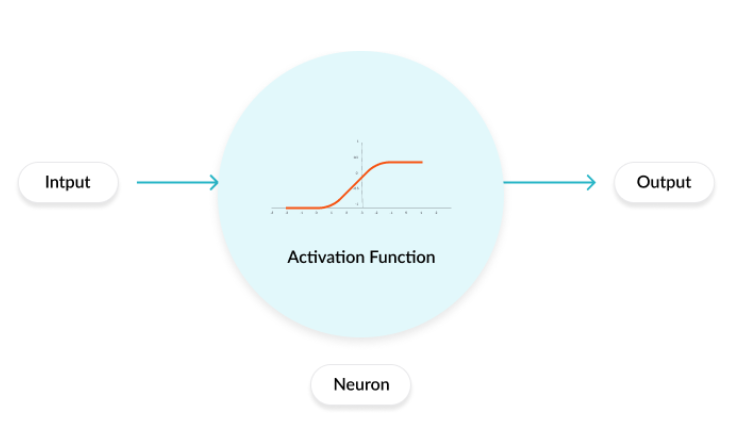

An additional aspect of activation functions is that they must be computationally efficient because they are calculated across thousands or even millions of neurons for each data sample. Modern neural networks use a technique called backpropagation to train the model, which places an increased computational strain on the activation function, and its derivative function.

This link provides with the deatils of various activation functions and their pros and cons. 
https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/

In [ ]:
def act_model(act, hidden, image_size):
  # defining a sequential model
  model = Sequential()

  # adding first layer
  model.add(Dense(units=64, activation=act, input_shape=(image_size,)))

  # adding hidden layers
  for i in range(hidden):  
    model.add(Dense(units=32, activation=act))

  # adding last layer
  model.add(Dense(units=num_classes, activation='softmax'))
  # model.add(Dense(units=1, activation='sigmoid'))

  # printing model summary
  print(model.summary())
  return model

### Sigmoid Activation Function

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 53,706
Trainable params: 53,706
Non-trainable params: 0
_________________________________________________________________
None


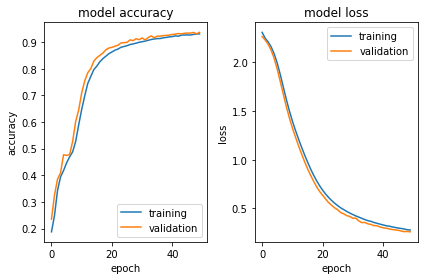

Test loss: 0.288
Test accuracy: 0.927


In [ ]:
M1 = act_model('sigmoid', hidden = 2 , image_size = 784)
M1.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

H1 = M1.fit(training_data, training_labels, batch_size=128, epochs=50, verbose=False, validation_split=.1)
plot_training_history(H1, M1)

### ReLU activation function

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 53,706
Trainable params: 53,706
Non-trainable params: 0
_________________________________________________________________
None


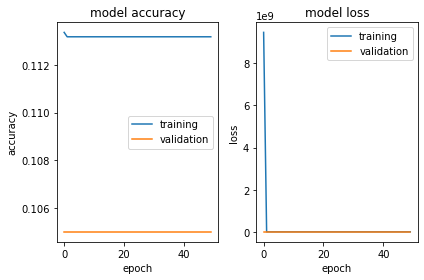

Test loss: 2.3
Test accuracy: 0.113


In [ ]:
M2 = act_model('relu', hidden = 2 , image_size = 784)
M2.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

H2 = M2.fit(training_data, training_labels, batch_size=128, epochs=50, verbose=False, validation_split=.1)
plot_training_history(H2, M2)

### Write code for tanh, linear, etc.

In [ ]:
# write your code here

### Leaky ReLU function
f(x) = alpha * x if x < 0

  f(x) = x if x >= 0

In [ ]:
from keras.layers import LeakyReLU

model = Sequential()

# adding first layer
model.add(Dense(units=64, input_shape=(image_size,)))
model.add(LeakyReLU(alpha=.1))
# adding hidden layers
for i in range(2):  
  model.add(Dense(units=32))
  model.add(LeakyReLU(alpha=.1))

# adding last layer
model.add(Dense(units=num_classes, activation='softmax'))

# printing model summary
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                50240     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

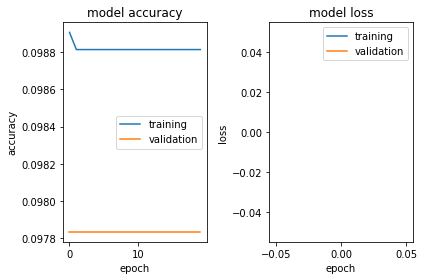

Test loss: nan
Test accuracy: 0.098


In [ ]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

Softmax is used to produce N output values that always sum to one. It is almost always used in the final layer of classification networks, and we interpret the results as the proababilities or confidence of our network's predictions. 

Read more about softmax : https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d

# Loss Functions

The purpose of loss functions is to compute the quantity that a model should seek to minimize during training. Broadly speaking, there are two categories of loss function, those used for classification and those used for regression.

Unlike activation functions, loss functions are not part of the neural network architecture. Instead they are part of the training process

About various loss functions : https://keras.io/api/losses/




In [ ]:
def new_model():
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=(image_size,)))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=num_classes, activation='softmax'))
    
    return model

In [ ]:
def plot_training_history(history, model, loss_function):
    figure = plt.figure()
    figure.suptitle(loss_function)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()
    
    figure.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

### Classification

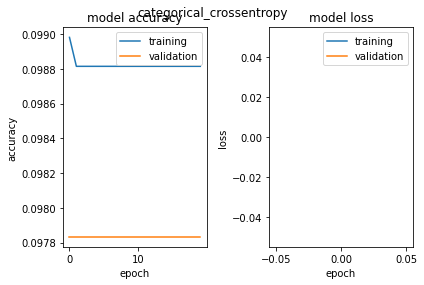

Test loss: nan
Test accuracy: 0.098


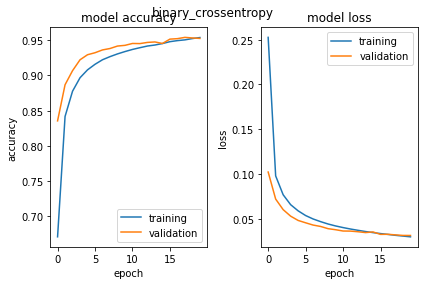

Test loss: 0.0357
Test accuracy: 0.943


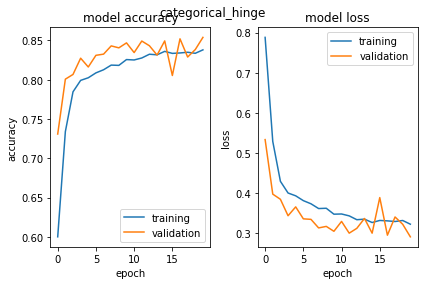

Test loss: 0.315
Test accuracy: 0.842


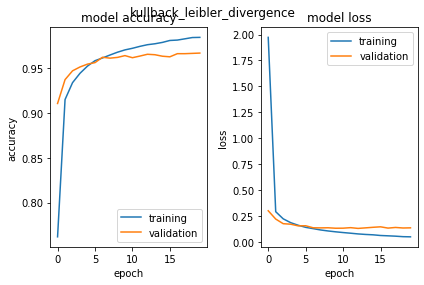

Test loss: 0.148
Test accuracy: 0.961


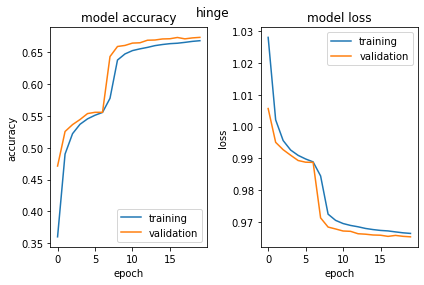

Test loss: 0.967
Test accuracy: 0.664


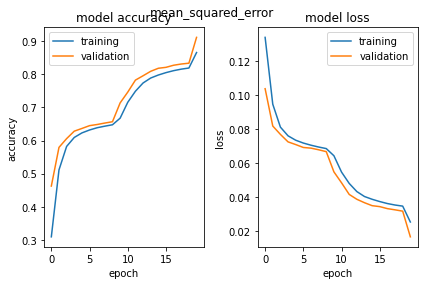

Test loss: 0.0193
Test accuracy: 0.897


In [ ]:
loss_functions = [
    'categorical_crossentropy',
    'binary_crossentropy',
    'categorical_hinge',
    'kullback_leibler_divergence',
    'hinge',
    'mean_squared_error'
]

histories = []

for loss_function in loss_functions:
    model = new_model()
    model.compile(optimizer="sgd", loss=loss_function, metrics=['accuracy'])
    history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
    plot_training_history(history, model, loss_function)
    histories.append(history)

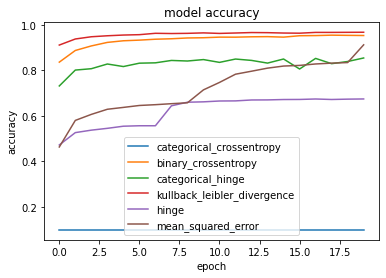

In [ ]:
for loss_function, history in zip(loss_functions, histories):
    plt.plot(history.history['val_accuracy'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loss_functions, loc='best')
plt.show()

# Optimizers

Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses. Optimization algorithms or strategies are responsible for reducing the losses and to provide the most accurate results possible.

More info : https://keras.io/api/optimizers/

In [ ]:

def plot_training_history(history, model, name, time):
    figure = plt.figure()
    figure.suptitle(name)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()
    
    figure.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Trained in {time} seconds')
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
  


### Various Optimizers example

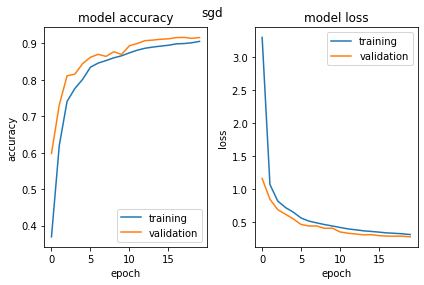

Trained in 34.359681362 seconds
Test loss: 0.315
Test accuracy: 0.905


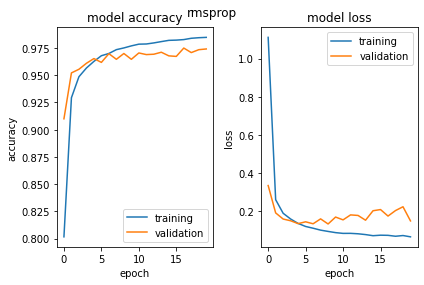

Trained in 39.00191124700001 seconds
Test loss: 0.235
Test accuracy: 0.972


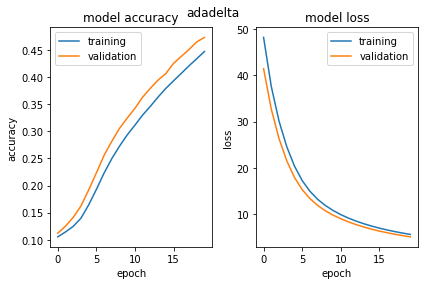

Trained in 39.075859830999946 seconds
Test loss: 5.51
Test accuracy: 0.452


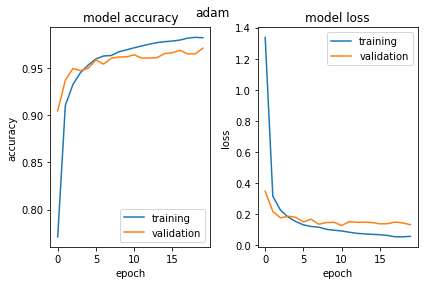

Trained in 41.60342188700008 seconds
Test loss: 0.149
Test accuracy: 0.965


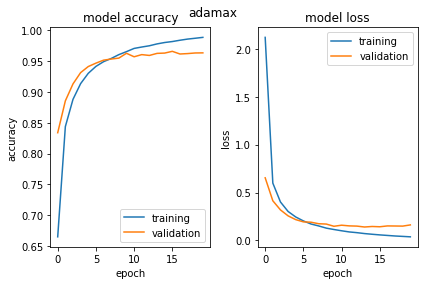

Trained in 37.89292049100004 seconds
Test loss: 0.178
Test accuracy: 0.961


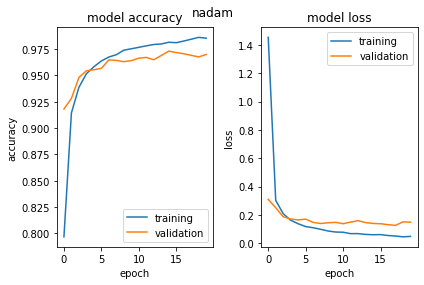

Trained in 44.81231069499995 seconds
Test loss: 0.161
Test accuracy: 0.963


In [ ]:
import time # To know the speed of these optimizers.

optimizers = [
    'sgd',
    'rmsprop',
    'adadelta',
    'adam',
    'adamax',
    'nadam'
]

histories = []

for optimizer in optimizers:
    model = new_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start = time.process_time()
    history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
    stop = time.process_time()
    plot_training_history(history, model, optimizer, stop - start)
    histories.append(history)

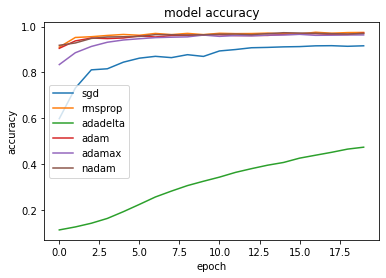

In [ ]:
# Cleaner visulizations all in one place
for optimizer, history in zip(optimizers, histories):
    plt.plot(history.history['val_accuracy'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(optimizers, loc='best')
plt.show()

It's also worth noting that all of these optimizers have their own hyper-parameters that can be fined tuned even further. eg. learning rate

Code Sample : 
opt = keras.optimizers.Adam(learning_rate=0.01)

# Regularization

Regularization is a technique which is used to solve the overfitting problem of the machine learning models.

### Dropout

The term “dropout” refers to dropping out units (both hidden and visible) in a neural network.

https://keras.io/api/layers/regularization_layers/dropout/

In [ ]:
from keras.layers import Dropout

In [ ]:
def plot_training_history(history, model):
    figure = plt.figure()
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()
    
    figure.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [ ]:
def model_with_dropout(dropout_rate):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=(image_size,)))
    
    for _ in range(2):
        model.add(Dense(units=32, activation='relu'))
        model.add(Dropout(rate=dropout_rate))

    model.add(Dense(units=num_classes, activation='softmax'))
    
    return model


dropout_rate: 0.8


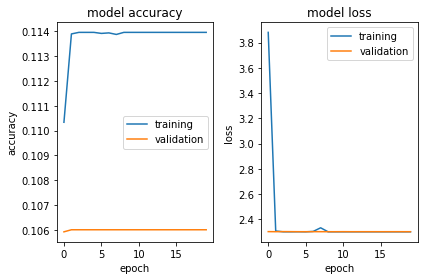

Test loss: 2.3
Test accuracy: 0.113

dropout_rate: 0.5


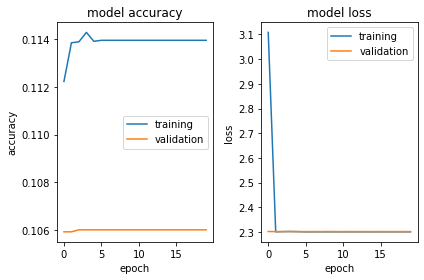

Test loss: 2.3
Test accuracy: 0.113

dropout_rate: 0.3


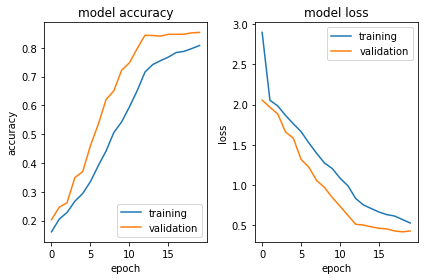

Test loss: 0.461
Test accuracy: 0.853

dropout_rate: 0.2


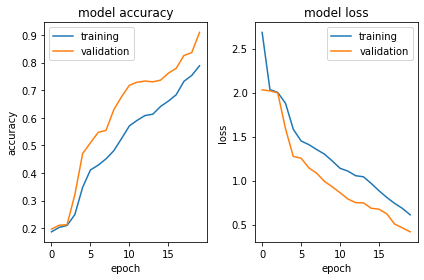

Test loss: 0.445
Test accuracy: 0.912

dropout_rate: 0.1


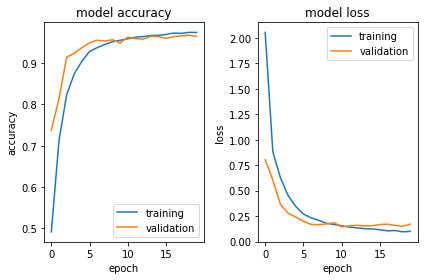

Test loss: 0.177
Test accuracy: 0.965


In [ ]:
epochs = 20
batch_size = 32
validation_split = 0.2

dropout_rates = [.8, .5, .3, .2, .1]

for dropout_rate in dropout_rates:
    model = model_with_dropout(dropout_rate)
    model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(training_data, training_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split)
    print(f'\ndropout_rate: {dropout_rate}')
    plot_training_history(history, model)

### Early Stopping

Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

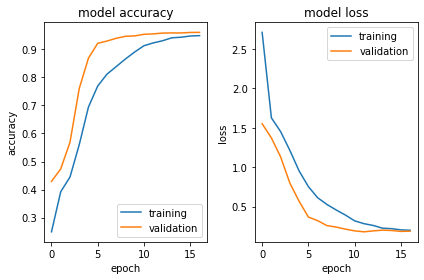

Test loss: 0.177
Test accuracy: 0.952


In [ ]:
from keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model = model_with_dropout(0.2)
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=batch_size, epochs=100, verbose=False, 
                    validation_split=validation_split, callbacks=[early_stopper])
plot_training_history(history, model)